Librairies

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from numpy.random import seed
from numpy.random import randn
import pandas as pd 
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

Lecture d'un fichier CSV

In [62]:
input_file = "./data/iris.csv"

df = pd.read_csv(input_file, header = None,delimiter = ";")
IRIS=df.to_numpy()
X=IRIS[:,0:3]
Y_text=IRIS[:,4]
is0=Y_text==Y_text[0]
is1=Y_text==Y_text[60]
is2=Y_text==Y_text[120]
sx=X.shape
y=np.zeros(sx[0])
y[is1]=1
y[is2]=2
yref=y;
yref[is0]=1
yref[is1]=-1
yref[is2]=-1
adv=is1+is2


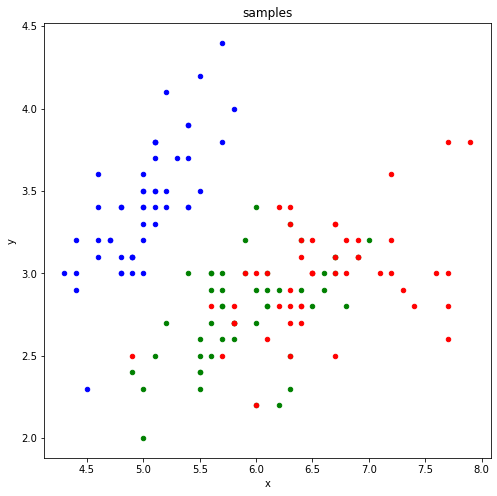

In [66]:
plt.figure(figsize=(8,8))
plt.scatter(X[is0,0],X[is0,1],color='blue',s=20)
plt.scatter(X[is1,0],X[is1,1],color='green',s=20)
plt.scatter(X[is2,0],X[is2,1],color='red',s=20)
plt.xlabel('x')  
plt.ylabel('y')  
plt.title("samples") 
plt.show()

In [60]:
p_det=np.zeros(20)
p_fa=np.zeros(20)
for k in range(0,20):
#    X_app, X_test, y_app, y_test = train_test_split(X[is0,:], y[is0], test_size=0.33, random_state=42)
    X_app, X_test, y_app, y_test = train_test_split(X[is0,:], y[is0], test_size=0.33)
    ocsvm = OneClassSVM(kernel='rbf', gamma=0.1,nu=0.05)
    ocsvm.fit(X_app)
    Y_iris_pred_test=ocsvm.predict(X_test)
    Y_iris_pred_adv=ocsvm.predict(X[adv,:])
    p_det[k]=accuracy_score(y_test, Y_iris_pred_test)
    p_fa[k]=1-accuracy_score(yref[adv], Y_iris_pred_adv)

In [61]:
print(np.mean(p_fa))
print(np.mean(p_det))

0.0
0.9529411764705882
